SVM


*   SVMとは
*   マージン
*   非線形(カーネルトリック)
*   ソフトマージン





SVMとは  
→主に分類に使う

![SVM](https://avinton.com/wp-content/uploads/2018/03/how_svm_works_1.png)

データを分類するときに，分割する線に一番近いデータと線の距離が一番大きくなるような線を決める

分割する線→決定境界

一番近いデータ→Support vectors

決定境界とSupport vectorsとの距離→マージン

![マージン](https://avinton.com/wp-content/uploads/2018/03/how_svm_works_4.jpg)

https://avinton.com/academy/svm/  
https://logics-of-blue.com/svm-concept/  
https://qiita.com/c60evaporator/items/8864f7c1384a3c6e9bd9  


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

シンプルな分類(線形)

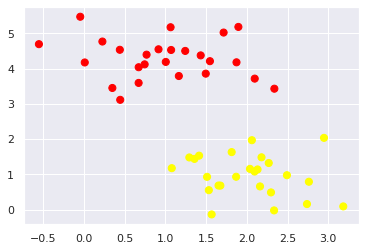

In [3]:
from sklearn.datasets import make_blobs
#make_blobsで50データ，2クラスター，標準偏差0.6のデータを生成
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

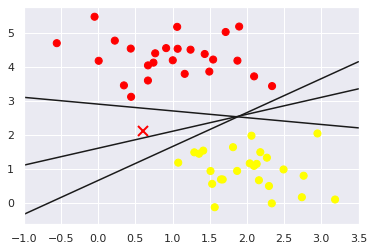

In [4]:
#決定境界が複数引けてしまう
#感覚で3つ引いてみてる
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
#決定境界をどれにするかによって×のデータのラベルが変わる

マージン  
決定境界から一番近いデータのマージンを一番大きくする必要がある

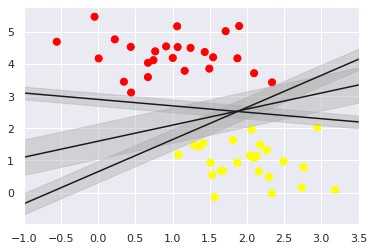

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
#fill_betweenでマージンを表示
#https://cranethree.hatenablog.com/entry/2015/07/25/204608

SVMで決定境界を引いてみる

In [6]:
#sklearnでsvmはsvc
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    #格子列を生成
    #https://deepage.net/features/numpy-meshgrid.html
    Y, X = np.meshgrid(y, x)
    #連結
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    #推定度を計算(値が大きいほどそのクラスである可能性が高い)
    #https://www.letitride.jp/entry/2020/07/23/185428
    P = model.decision_function(xy).reshape(X.shape)
    
    #決定境界とマージン
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    #plot
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

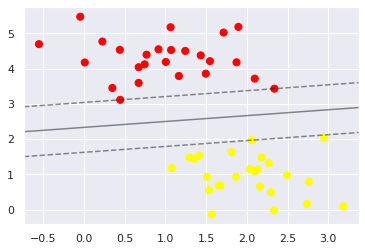

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [9]:
#support_vectors_でsupport vectorsの座標を表示
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

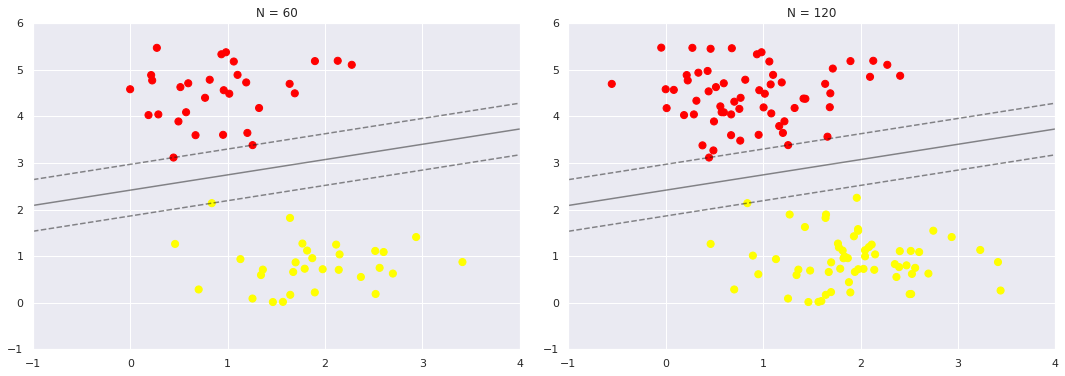

In [10]:
#データを増やしてみる
#決定境界はsupport vectorsの位置だけが重要
#N=60とN=120のデータで試してみる
#増やしても決定境界の位置は変わってない
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [11]:
#ipythonを使えばインタラクティブなグラフを作れる
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));
#https://qiita.com/studio_haneya/items/adbaa01b637e7e699e75

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

**カーネルSVM**  
→線形関数で表せないデータを扱うときに、高次元化して、線形分離できるようにする  
n次元以上のデータで最適化するときにつかう関数が**カーネル関数**

高次元化はデータの**写像**を計算する  
本来なら高次元化したときに本来のデータと写像との内積を計算しなきゃいけない

ある決まった形の**カーネル関数**を予め決めておいて、それのパラメータを決めるだけにする  
→**カーネルトリック**

高次元化のイメージ  
![高次元化](https://kenyu-life.com/wp-content/uploads/2019/04/SVM_kernel3.jpg)

出典：https://kenyu-life.com/2019/04/22/svm_kernel/




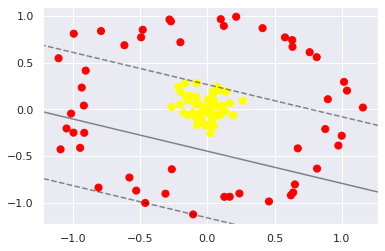

In [12]:
from sklearn.datasets import make_circles
#make_circlesで円周上のデータを作成
X, y = make_circles(100, factor=.1, noise=.1)
#試しに線形SVMでやってみてもうまくいかない
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
#高次元化
#真ん中の黄色いデータを中心として、放射基底関数を作る
r = np.exp(-(X ** 2).sum(1))

In [14]:
#高次元化したデータをplot
#上下左右に動かせるインタラクティブなグラフを作成
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 30, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(-90, 30, 90), value=30), IntSlider(value=…

In [15]:
#sklearnではkernel=rbf(放射基底関数)を選択するだけでカーネルトリックできる
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

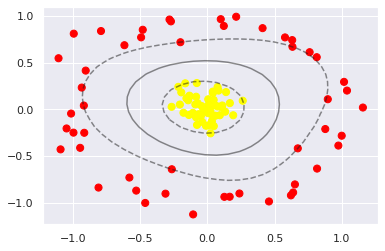

In [16]:
#決定境界を表せた
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

ソフトマージン  
→複雑なデータのときどれくらい分類を間違えてても許せるのか？



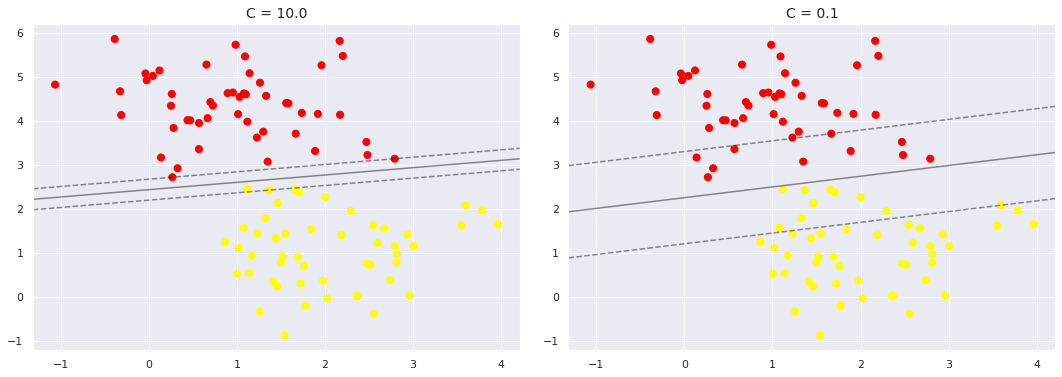

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
#SVC(C=<コストパラメータ>)に設定することで誤りを許容する度合いを変更、正則化項の係数
#大きいほど誤りを許容しなくなる
#今回はC=10とC=0.1で試してみる
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

顔認証の例  
→顔画像から名前を分類

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
#50人分の顔画像と名前

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


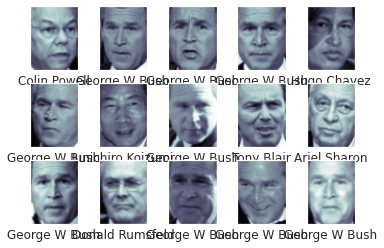

In [19]:
#データ確認
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [20]:
#モデル準備
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
#主成分分析、画像は3000pxあってそれぞれを説明変数として使えるがそれだと多いので150個に絞る
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [21]:
#データ分割
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [22]:
#グリッドサーチでパラメータチューニング
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
#gamma=カーネル関数の係数,C=正則化の係数(どれだけ誤りを許すか)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min, sys: 40.7 s, total: 1min 41s
Wall time: 55.5 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [23]:
#モデル作成して予測
model = grid.best_estimator_
yfit = model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_

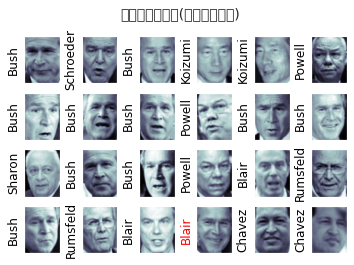

In [24]:
#結果表示
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('予測された名前(不正解は赤字)', size=14);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



 - precision=適合率  
→TP/TP+FP  
 - recall=再現率  
→TP/TP+FN  
 - f1-score=F値  
=2*precision*recall/precision+recall  
 - support=正解データの個数

 https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4

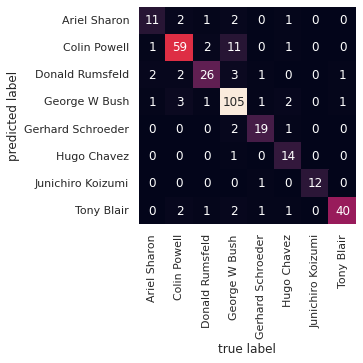

In [26]:
#ヒートマップで確認
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');